# Importing all libraries

In [85]:
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [77]:
import pandas as pd
uber_df = pd.read_csv("/work/20250412-175421/datasets/ds_challenge_v2_1_data.csv")
first_completed_df = uber_df[uber_df['first_completed_date'].notnull()]
non_first_completed_df = uber_df[uber_df['first_completed_date'].isna()]
city_drivers_df = first_completed_df

# Cleaning and Making New Columns

In [79]:
cleaned_date_df = uber_df.dropna(subset=['signup_date', 'first_completed_date', 'vehicle_added_date', 'bgc_date'])

cleaned_date_df['signup_date'] = pd.to_datetime(cleaned_date_df['signup_date'], format="%Y-%m-%d")
cleaned_date_df['first_completed_date'] = pd.to_datetime(cleaned_date_df['first_completed_date'], format="%Y-%m-%d")
cleaned_date_df['vehicle_added_date'] = pd.to_datetime(cleaned_date_df['vehicle_added_date'], format="%Y-%m-%d")
cleaned_date_df['bgc_date'] = pd.to_datetime(cleaned_date_df['bgc_date'], format="%Y-%m-%d")

uber_df['days_to_first_trip'] = (cleaned_date_df['first_completed_date'] - cleaned_date_df['signup_date']).dt.days
uber_df['days_to_add_vehicle'] = (cleaned_date_df['vehicle_added_date'] - cleaned_date_df['signup_date']).dt.days
uber_df['days_to_background_check'] = (cleaned_date_df['bgc_date'] - cleaned_date_df['signup_date']).dt.days

uber_df.to_csv("/work/20250412-175421/datasets/ds_challenge_v2_1_data.csv", index=False)


/tmp/ipykernel_45/3212326033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_date_df['signup_date'] = pd.to_datetime(cleaned_date_df['signup_date'], format="%Y-%m-%d")
/tmp/ipykernel_45/3212326033.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_date_df['first_completed_date'] = pd.to_datetime(cleaned_date_df['first_completed_date'], format="%Y-%m-%d")
/tmp/ipykernel_45/3212326033.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [81]:
print(first_completed_df["vehicle_year"].value_counts())

print(non_first_completed_df["vehicle_year"].value_counts())

vehicle_year
2015.0    1073
2014.0     763
2013.0     707
2016.0     559
2012.0     484
2011.0     330
2007.0     298
2008.0     290
2010.0     280
2006.0     240
2009.0     233
2005.0     180
2004.0     157
2003.0     131
2002.0      84
2001.0      60
2000.0       2
1998.0       1
Name: count, dtype: int64
vehicle_year
2015.0    1329
2014.0     892
2013.0     744
2012.0     638
2016.0     591
2007.0     413
2011.0     372
2008.0     369
2010.0     365
2006.0     310
2009.0     280
2005.0     270
2003.0     219
2004.0     212
2002.0     167
2001.0     109
2000.0      27
1999.0      14
1998.0       9
2017.0       6
1997.0       6
1996.0       4
0.0          4
1995.0       1
Name: count, dtype: int64


# Initial Data Visualization

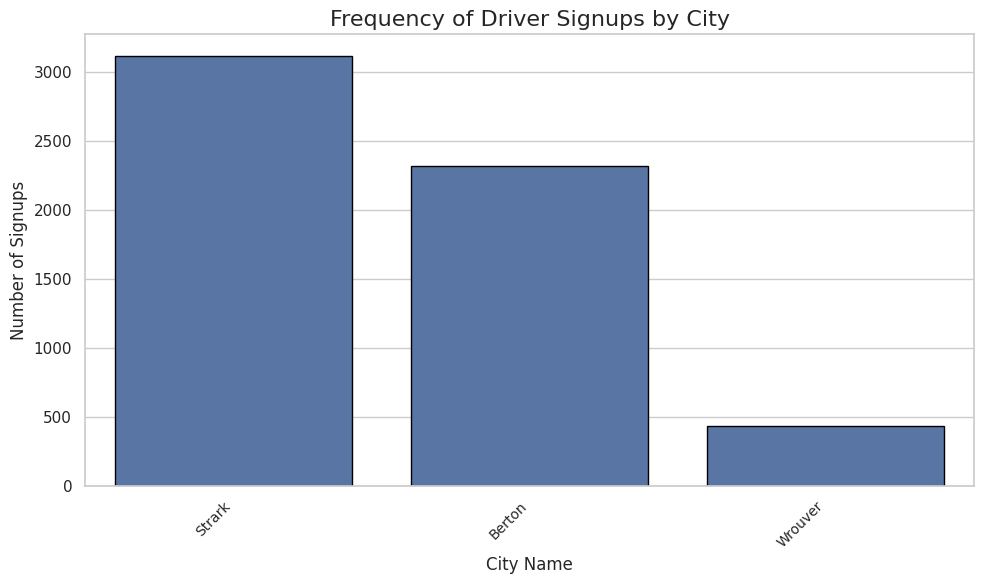

In [126]:
sns.set(style="whitegrid")

city_name = first_completed_df["city_name"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=city_name.index, y=city_name.values, edgecolor='black')

plt.title("Frequency of Driver Signups by City", fontsize=16)
plt.xlabel("City Name", fontsize=12)
plt.ylabel("Number of Signups", fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()

plt.show()

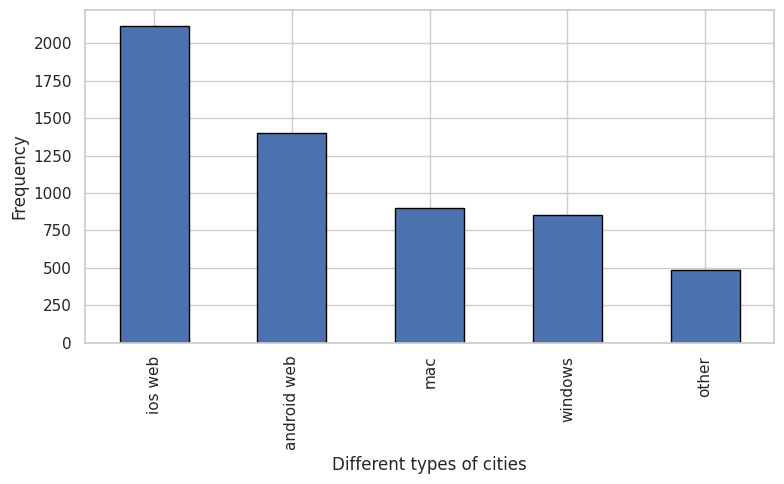

In [89]:
signup_os_counts = first_completed_df['signup_os'].value_counts()
plt.figure(figsize=(8, 5))
signup_os_counts.plot(kind='bar', edgecolor='black')
plt.xlabel("Different types of cities")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

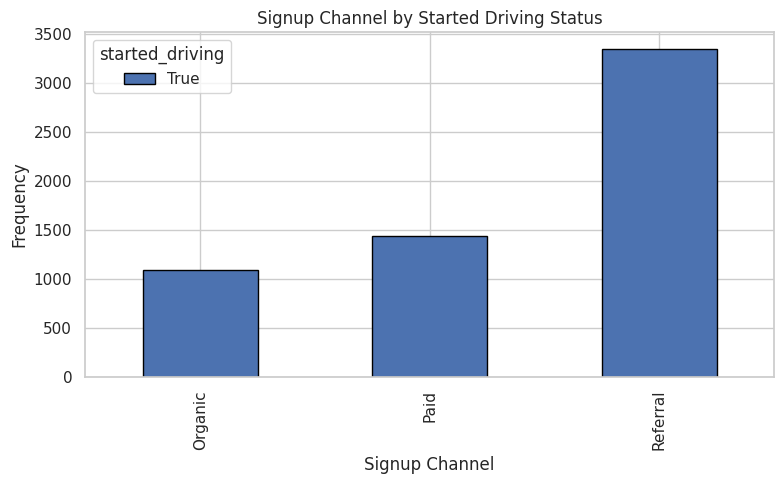

True
1091    1
1436    1
3345    1
Name: count, dtype: int64

In [91]:
signup_channel_counts = first_completed_df.groupby(['signup_channel', 'started_driving']).size().reset_index(name='count')

pivot_df = signup_channel_counts.pivot(index='signup_channel', columns='started_driving', values='count').fillna(0)

pivot_df.plot(kind='bar', edgecolor='black', figsize=(8,5))

plt.xlabel("Signup Channel")
plt.ylabel("Frequency")
plt.title("Signup Channel by Started Driving Status")
plt.tight_layout()
plt.show()
pivot_df.value_counts()

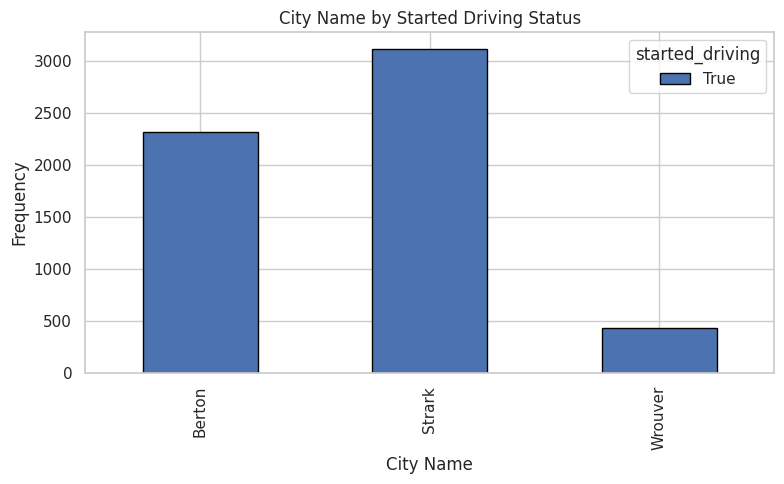

True
436     1
2317    1
3119    1
Name: count, dtype: int64

In [93]:
signup_channel_counts = first_completed_df.groupby(['city_name', 'started_driving']).size().reset_index(name='count')

pivot_df = signup_channel_counts.pivot(index='city_name', columns='started_driving', values='count').fillna(0)

pivot_df.plot(kind='bar', edgecolor='black', figsize=(8,5))

plt.xlabel("City Name")
plt.ylabel("Frequency")
plt.title("City Name by Started Driving Status")
plt.tight_layout()
plt.show()
pivot_df.value_counts()

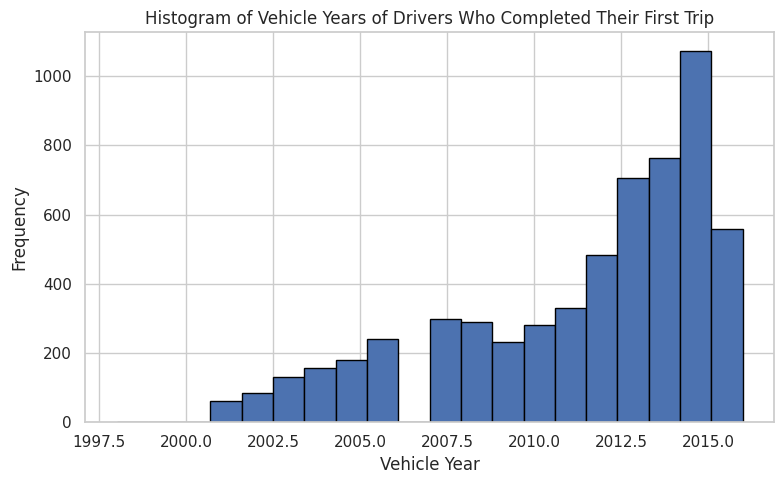

In [95]:
vehicle_year_counts = first_completed_df['vehicle_year'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.hist(first_completed_df['vehicle_year'].dropna(), bins=20, edgecolor='black') 
plt.xlabel("Vehicle Year")
plt.ylabel("Frequency")
plt.title("Histogram of Vehicle Years of Drivers Who Completed Their First Trip")
plt.tight_layout()
plt.show()

In [97]:
print(uber_df[['signup_date', 'first_completed_date', 'vehicle_added_date', 'bgc_date']].isna().sum())


signup_date             48809
first_completed_date    48809
vehicle_added_date      48809
bgc_date                48809
dtype: int64


# Encoding the Categorical Variables

In [99]:
uber_df_encoded = pd.get_dummies(uber_df, columns=['signup_os', 'signup_channel', 'city_name'], drop_first=True)

# Splitting into Training and Testing

In [103]:
y = uber_df_encoded['started_driving'].astype(int)

features = [
    'days_to_add_vehicle',
    'days_to_background_check'
]

features += [col for col in uber_df_encoded.columns 
             if col.startswith('signup_os_') or 
                col.startswith('signup_channel_') or 
                col.startswith('city_name_')]

X = uber_df_encoded[features]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=features)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=73)

# Logistic Regression Model

In [133]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# Assuming X_train, y_train, X_test, and y_test are already defined
logreg = LogisticRegression(max_iter=1000)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=73)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Fit the logistic regression model on the resampled data
logreg.fit(X_resampled, y_resampled)

# Make predictions
y_pred_lr = logreg.predict(X_test)
y_pred_proba_lr = logreg.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nAUC-ROC Score:\n", roc_auc_score(y_test, y_pred_proba_lr))

ImportError: cannot import name 'OneToOneFeatureMixin' from 'sklearn.base' (/root/venv/lib/python3.10/site-packages/sklearn/base.py)

In [108]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
})

coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()

coefficients['Log_Abs_Coefficient'] = np.log1p(coefficients['Abs_Coefficient'])

top_coefficients = coefficients.sort_values(by='Log_Abs_Coefficient', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_coefficients['Feature'], top_coefficients['Log_Abs_Coefficient'], color='salmon')
plt.xlabel('Log(Absolute Coefficient)')
plt.title('Top 10 Feature Importances (Logistic Regression - Log Scale)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(top_coefficients)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

# XGBoost Model

In [110]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    random_state=73,
    n_estimators=100,
    max_depth=6,
    scale_pos_weight=1,
    missing=np.nan
)
if 'const' in X_train.columns:
    X_train = X_train.drop(columns=['const'])

if 'const' in X_test.columns:
    X_test = X_test.drop(columns=['const'])

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC-ROC

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nAUC-ROC Score:\n", roc_auc_score(y_test, y_pred_proba_xgb))
joblib.dump(xgb_model, "xgb_model.pkl")

Confusion Matrix:
 [[12203     0]
 [   26  1442]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12203
           1       1.00      0.98      0.99      1468

    accuracy                           1.00     13671
   macro avg       1.00      0.99      1.00     13671
weighted avg       1.00      1.00      1.00     13671


AUC-ROC Score:
 0.9938741221672164


['xgb_model.pkl']


Feature Importances:
                     Feature  Importance
1  days_to_background_check    0.882480
0       days_to_add_vehicle    0.116854
7   signup_channel_Referral    0.000155
9         city_name_Wrouver    0.000093
6       signup_channel_Paid    0.000080
4           signup_os_other    0.000079
3             signup_os_mac    0.000074
2         signup_os_ios web    0.000069
8          city_name_Strark    0.000062
5         signup_os_windows    0.000054


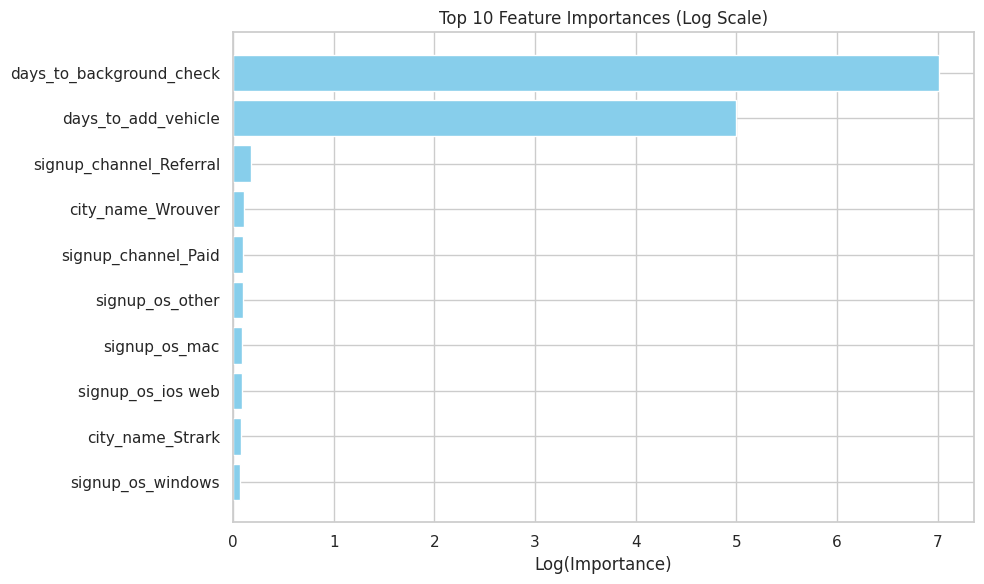

In [114]:
importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", feature_importance_df.head(10))

importance_dict = xgb_model.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Importance'])

importance_df['Log_Importance'] = np.log1p(importance_df['Importance'])

importance_df = importance_df.sort_values(by='Log_Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Log_Importance'], color='skyblue')
plt.xlabel('Log(Importance)')
plt.title('Top 10 Feature Importances (Log Scale)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Cross-Validating the XGBoost Model

In [116]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='roc_auc')

print("Cross-validated AUC-ROC scores:", cv_scores)
print("Mean AUC-ROC:", cv_scores.mean())

Cross-validated AUC-ROC scores: [0.99641445 0.99463131 0.99514334 0.99680533 0.99685091]
Mean AUC-ROC: 0.9959690665018005


# Heatmaps for Model Performance

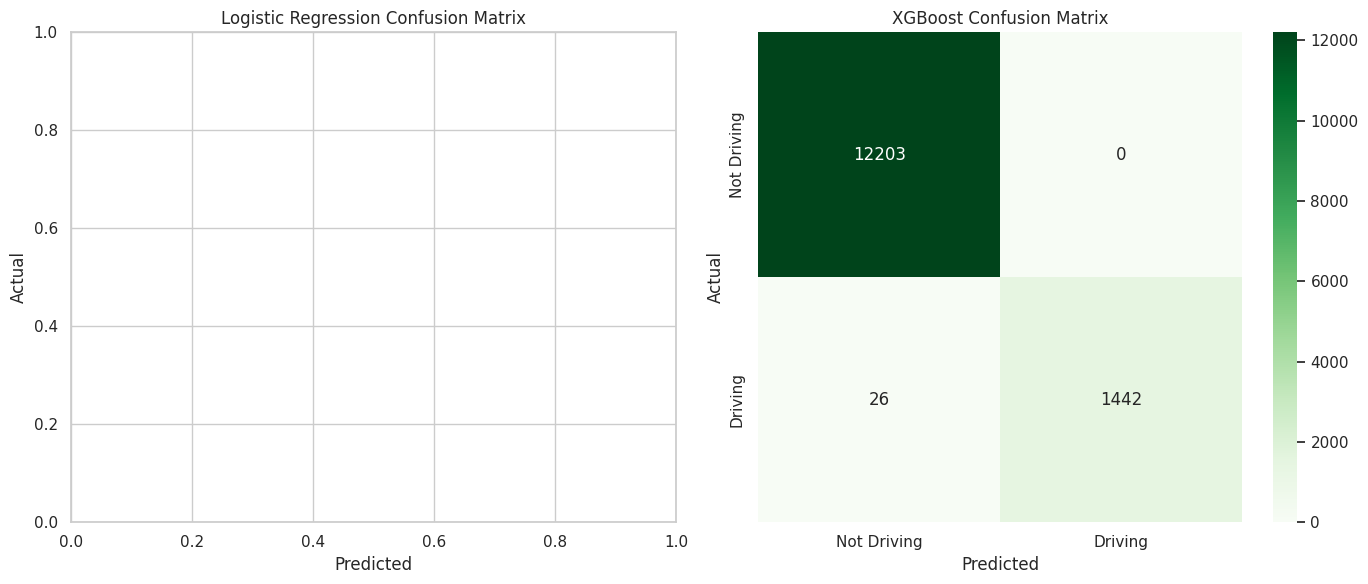

In [120]:
cm_logreg = confusion_matrix(y_test, logreg.predict(X_test))

cm_xgb = confusion_matrix(y_test, xgb_model.predict(X_test))

labels = ['Not Driving', 'Driving']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e98723d2-d4ae-4687-9a10-dafea16a514c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>